# 📈 Google Trends Meets Real-World Data

Have you ever wondered whether **people’s online searches** can tell us something about  
**financial markets** or even **the economy**?  

That’s exactly what we’ll explore in this project. Using **Google Trends** data,  
we’ll compare search popularity with **stock prices**, **cryptocurrency movements**,  
and **unemployment rates**.  

Our main investigations:  
- 🚘 How do searches for *"Tesla"* relate to Tesla’s stock price?  
- ₿ Do searches for *"Bitcoin"* reflect its market price?  
- 📉 Can searches for *"Unemployment Benefits"* serve as an early signal for the unemployment rate?  

By the end, you’ll see how **curiosity on the internet** can sometimes mirror (or even predict!)  
what happens in the real world.

## 🛠️ Setting Up the Tools

Before diving into the data, let’s bring in the essential Python libraries  
that will power our analysis:  

- **pandas** → to work with tabular data  
- **matplotlib** → for visualizations  
- **numpy** → for numerical computations  
- **seaborn** → to make charts more beautiful  

With these, we’ll have everything we need to explore, clean, and visualize our datasets.

In [2]:
# Import the essential libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style for plots
plt.style.use('seaborn-v0_8-darkgrid')

## 📂 Loading the Data

Our project comes with **five CSV files** that capture search interest and real-world values:  

1. **Tesla** – Monthly Google searches vs. Tesla stock price  
2. **Unemployment Benefits** – Monthly searches vs. U.S. unemployment rate  
3. **Bitcoin Price** – Daily closing price & trade volume  
4. **Bitcoin Search (Monthly)** – Monthly search popularity of Bitcoin  

Let’s load them into **pandas DataFrames** so we can start exploring.

In [3]:
# Load datasets into pandas DataFrames

df_tesla = pd.read_csv("TESLA Search Trend vs Price.csv")
df_unemployment = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
df_btc_price = pd.read_csv("Daily Bitcoin Price.csv")
df_btc_search = pd.read_csv("Bitcoin Search Trend.csv")

# Confirm successful loading by printing shapes
print("Tesla DataFrame shape:", df_tesla.shape)
print("Unemployment DataFrame shape:", df_unemployment.shape)
print("Bitcoin Price DataFrame shape:", df_btc_price.shape)
print("Bitcoin Search DataFrame shape:", df_btc_search.shape)

Tesla DataFrame shape: (124, 3)
Unemployment DataFrame shape: (200, 3)
Bitcoin Price DataFrame shape: (2204, 3)
Bitcoin Search DataFrame shape: (73, 2)


## 👀 First Glance at the Data

Before any cleaning or analysis, it’s always good to **take a quick look** at our datasets.  
This will help us answer questions like:  

- How many rows & columns do we have?  
- What kind of values are inside?  
- Are there any obvious quirks or missing data?  

Think of this step as opening the **map** before starting a journey —  
we want to know the landscape before we dive in deeper.

In [5]:
# Preview the first few rows of each DataFrame

print("Tesla Data Preview:")
display(df_tesla.head())

print("Unemployment Data Preview:")
display(df_unemployment.head())

print("Bitcoin Price Data Preview:")
display(df_btc_price.head())

print("Bitcoin Search Data Preview:")
display(df_btc_search.head())

Tesla Data Preview:


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


Unemployment Data Preview:


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


Bitcoin Price Data Preview:


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


Bitcoin Search Data Preview:


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


# 🧹 Data Cleaning – Resampling Time Series Data

Before we can uncover patterns, we need to make sure our data is **trustworthy and comparable**.  
This step is like cleaning your glasses before reading a map — if the data is messy,  
our conclusions could be misleading.  

We’ll tackle three things:  
1. **Check for missing values** → do we have gaps in our data?  
2. **Convert date columns** → make sure time is properly recognized as dates.  
3. **Resample Bitcoin data** → align daily Bitcoin prices with monthly search interest.  

Let’s begin by checking for any missing values.

In [7]:
# ✅ Checking for missing values in all 4 DataFrames

print(f"Missing values for Tesla?: {df_tesla.isna().values.any()}")
print(f"Missing values for Unemployment?: {df_unemployment.isna().values.any()}")
print(f"Missing values for BTC Search?: {df_btc_search.isna().values.any()}")
print(f"Missing values for BTC Price?: {df_btc_price.isna().values.any()}")

# If missing values exist, count them
print("\nNumber of missing values per column in BTC Price DataFrame:")
print(df_btc_price.isna().sum())

# 🔍 Locate the rows with missing values in BTC Price
df_btc_price[df_btc_price.isna().any(axis=1)]

Missing values for Tesla?: False
Missing values for Unemployment?: False
Missing values for BTC Search?: False
Missing values for BTC Price?: True

Number of missing values per column in BTC Price DataFrame:
DATE      0
CLOSE     1
VOLUME    1
dtype: int64


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


## 🚨 Handling Missing Values

Our checks show that:  
- Tesla, Unemployment, and Bitcoin Search data are **clean** (no missing values ✅).  
- Bitcoin Price data, however, contains **2 missing values**.  

Since missing financial values could disrupt our analysis,  
we’ll **remove those rows** using `.dropna()`.  

This ensures our dataset remains consistent and ready for analysis.

In [8]:
# 🧹 Remove missing values from Bitcoin Price Data
df_btc_price.dropna(inplace=True)

# Verify that no missing values remain
print("Missing values after cleaning?:", df_btc_price.isna().values.any())

Missing values after cleaning?: False


## 🗓️ Converting Strings into DateTime Objects

Time is at the **heart of our analysis**.  
Currently, the date columns (`MONTH` or `DATE`) are stored as **strings**,  
but to properly analyze time-series data, we need them in **Datetime format**.  

We’ll use **`pd.to_datetime()`** to convert:  
- Tesla → `MONTH`  
- Bitcoin Search → `MONTH`  
- Unemployment → `MONTH`  
- Bitcoin Price → `DATE`  

This will let Pandas recognize these columns as **time-aware**,  
so we can resample, filter, and plot them correctly.

In [9]:
# Convert date columns to datetime format

df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

# ✅ Verify conversions
print("Tesla date type:", df_tesla['MONTH'].dtype)
print("BTC Search date type:", df_btc_search['MONTH'].dtype)
print("Unemployment date type:", df_unemployment['MONTH'].dtype)
print("BTC Price date type:", df_btc_price['DATE'].dtype)

Tesla date type: datetime64[ns]
BTC Search date type: datetime64[ns]
Unemployment date type: datetime64[ns]
BTC Price date type: datetime64[ns]


## 📊 Resampling Bitcoin Price Data

Now comes an important step:  
- **Bitcoin Price Data** → daily  
- **Bitcoin Search Data** → monthly  

To compare them, we need to bring Bitcoin prices to a **monthly frequency**.  
We’ll do this using Pandas’ `.resample()` method:  

- Use `on='DATE'` → resample based on the Date column  
- Use `'M'` → monthly frequency  
- Use `.last()` → keep the **last available price of the month**  

👉 This aligns Bitcoin’s **financial data** with its **search interest**,  
so we can compare them directly.

In [11]:
# Resample daily Bitcoin prices to monthly frequency, taking the last price of each month
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

# Preview the new monthly dataset
print("Shape of Monthly BTC Data:", df_btc_monthly.shape)
display(df_btc_monthly.head())

Shape of Monthly BTC Data: (73, 2)


/var/folders/_n/kg2383lx2b5f7z3f0qk8_jlw0000gn/T/ipykernel_1278/3800377883.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample('M', on='DATE').last()


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


## 🎉 Clean & Aligned Data Ready!

At this stage:  
- ✅ Missing values handled  
- ✅ Dates converted into proper Datetime objects  
- ✅ Bitcoin prices resampled to monthly  

Now, all our datasets are **aligned and clean**.  
We’re ready for the exciting part — **Data Visualization**,  
where we’ll finally get to see how search interest aligns with financial and economic data.  

👉 Next stop: **turning numbers into insights with charts!**

# 📈 Data Visualization – Tesla Line Charts

Now that our data is clean, let’s bring it to life!  
Visualization is where **raw numbers** turn into **insights**.  

We’ll start with Tesla:  
- **Stock Price (USD)** → financial reality.  
- **Google Search Popularity** → public curiosity.  

The question is:  
👉 *Does public interest in Tesla (searches) move with its stock price?*  

To answer this, let’s create a **dual-axis line chart**.  
One axis will track the stock price, while the other will track search trends.  

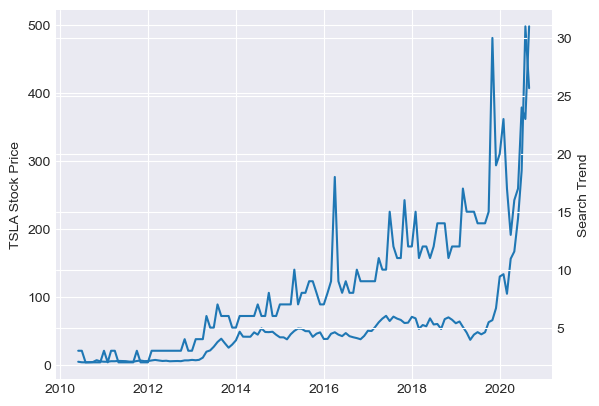

In [13]:
# ✅ Basic Tesla chart with two y-axes

import matplotlib.pyplot as plt

ax1 = plt.gca()  # get current axis
ax2 = ax1.twinx()  # create a twin axis

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

plt.show()

# 🎨 Making the Chart More Readable with Colors

The chart works… but it’s not yet exciting.  
Right now, both lines look too similar, and it’s easy to get confused.  

To fix this, we’ll:  
- Use a **red HEX code** for Tesla’s stock price.  
- Use a **blue named color** for search volume.  
- Match the colors of the lines with the axis labels.  

This way, readers can instantly connect each axis with the correct line.  

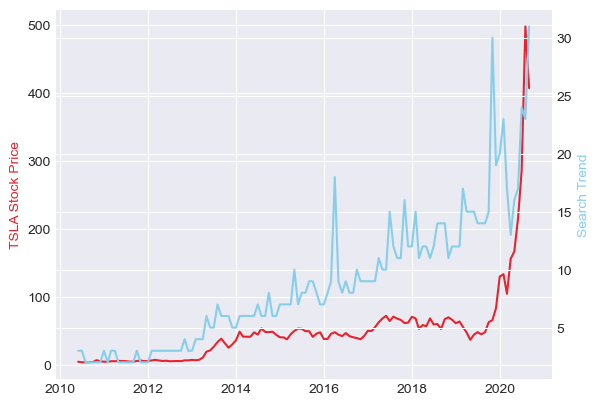

In [14]:
# 🎨 Adding colors to distinguish Tesla stock price vs search trend

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E')  # HEX red
ax2.set_ylabel('Search Trend', color='skyblue')       # Named blue

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')

plt.show()

# ✨ Polishing the Chart – From Rough Draft to Professional

We’re getting closer, but a great chart should be:  
- **Big enough to read comfortably**  
- **Well-labeled with larger fonts**  
- **Easy on the eyes with rotated x-axis labels**  
- **Visually appealing with thicker lines**  
- **Focused with axis limits**  

Finally, a bold title will tell our story:  
**"Tesla Web Search vs Price"**  

Let’s transform our chart from a draft into a professional visualization.  

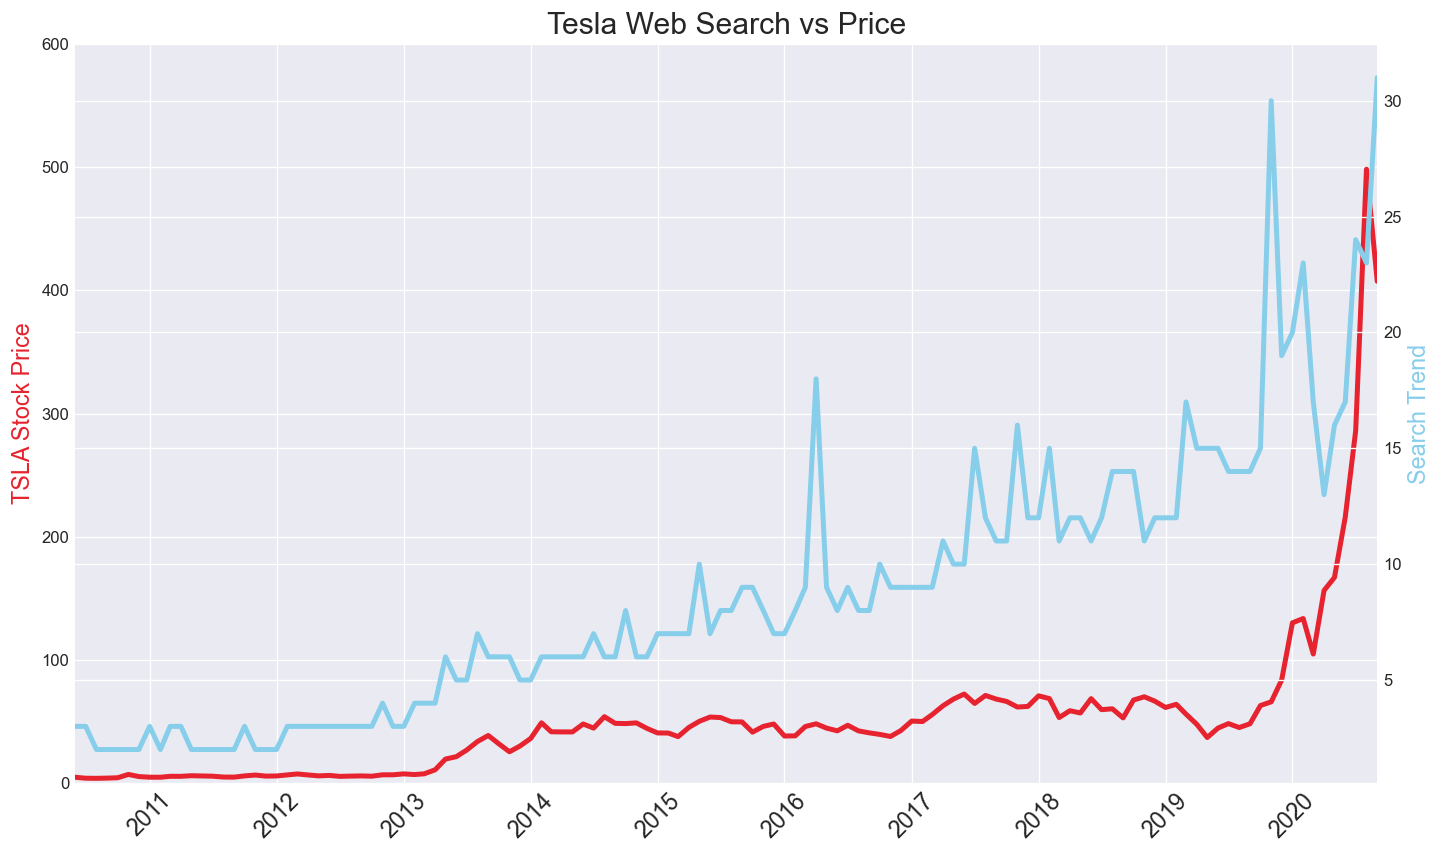

In [15]:
# 📊 Final polished Tesla visualization

plt.figure(figsize=(14,8), dpi=120)  # Larger chart with higher resolution
plt.title('Tesla Web Search vs Price', fontsize=18)

# Rotate and style x-axis labels
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# Axis labels with colors and larger fonts
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# Set y-axis limits and x-axis range
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# Plot data with thicker lines
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

## ⚠️ A Note on Matplotlib Warnings

If you noticed a **Matplotlib warning** about datetime conversion,  
don’t worry — it’s not an error.  

It just means Matplotlib wants us to be explicit about the datetime converter.  
To silence the warning, add this line at the top of your notebook (after imports):

```python
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 🗓️ Using Locators & DateFormatters to Control Tick Marks

So far, our Tesla chart looks great — but the **timeline axis** feels a bit cluttered.  
For time-series data, **tick marks** are one of the most important elements. They should:  

✔ Highlight major points in time (like years).  
✔ Allow smaller subdivisions (like months).  
✔ Show dates in a readable, consistent format.  

To do this, Matplotlib gives us **Locator helpers**.  
- `YearLocator()` → tells the axis where to put *major ticks* (every year).  
- `MonthLocator()` → tells the axis where to put *minor ticks* (every month).  
- `DateFormatter()` → defines how dates should look (e.g., `'%Y'` for just the year).  

Let’s apply these to Tesla’s chart and make our timeline crystal clear.  

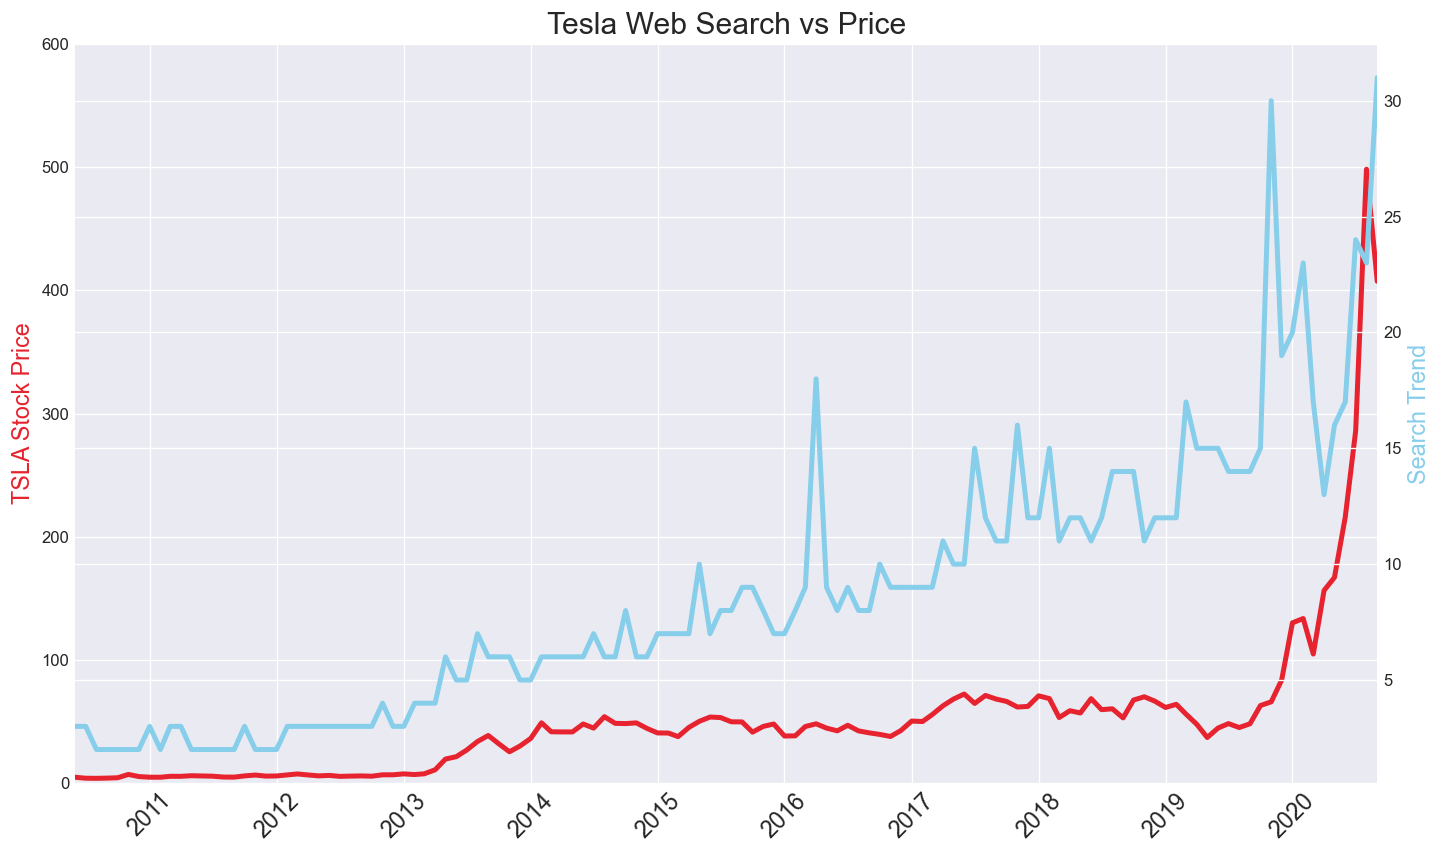

In [16]:
import matplotlib.dates as mdates

# Create locator and formatter objects
years = mdates.YearLocator()       # Major ticks every year
months = mdates.MonthLocator()     # Minor ticks every month
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# Apply locators and formatter
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

# ₿ Data Visualization – Bitcoin with Line Styles & Markers

Tesla was just the beginning… now let’s test the same visualization technique on **Bitcoin**.  
This dataset is especially exciting because it combines:  

- **Bitcoin Price (resampled monthly)** → wild financial swings.  
- **Bitcoin Search Popularity** → global curiosity and hype.  

🔍 Challenge:  
- Change the chart title → *"Bitcoin News Search vs Resampled Price"*  
- Left y-axis label → *"BTC Price"*  
- Adjust y- and x-axis limits for readability  
- Make the **price line dashed** (`'--'`)  
- Add **circle markers** (`'o'`) to the search trend line  

This will help us see:  
👉 Did people search more for Bitcoin when the price skyrocketed?  

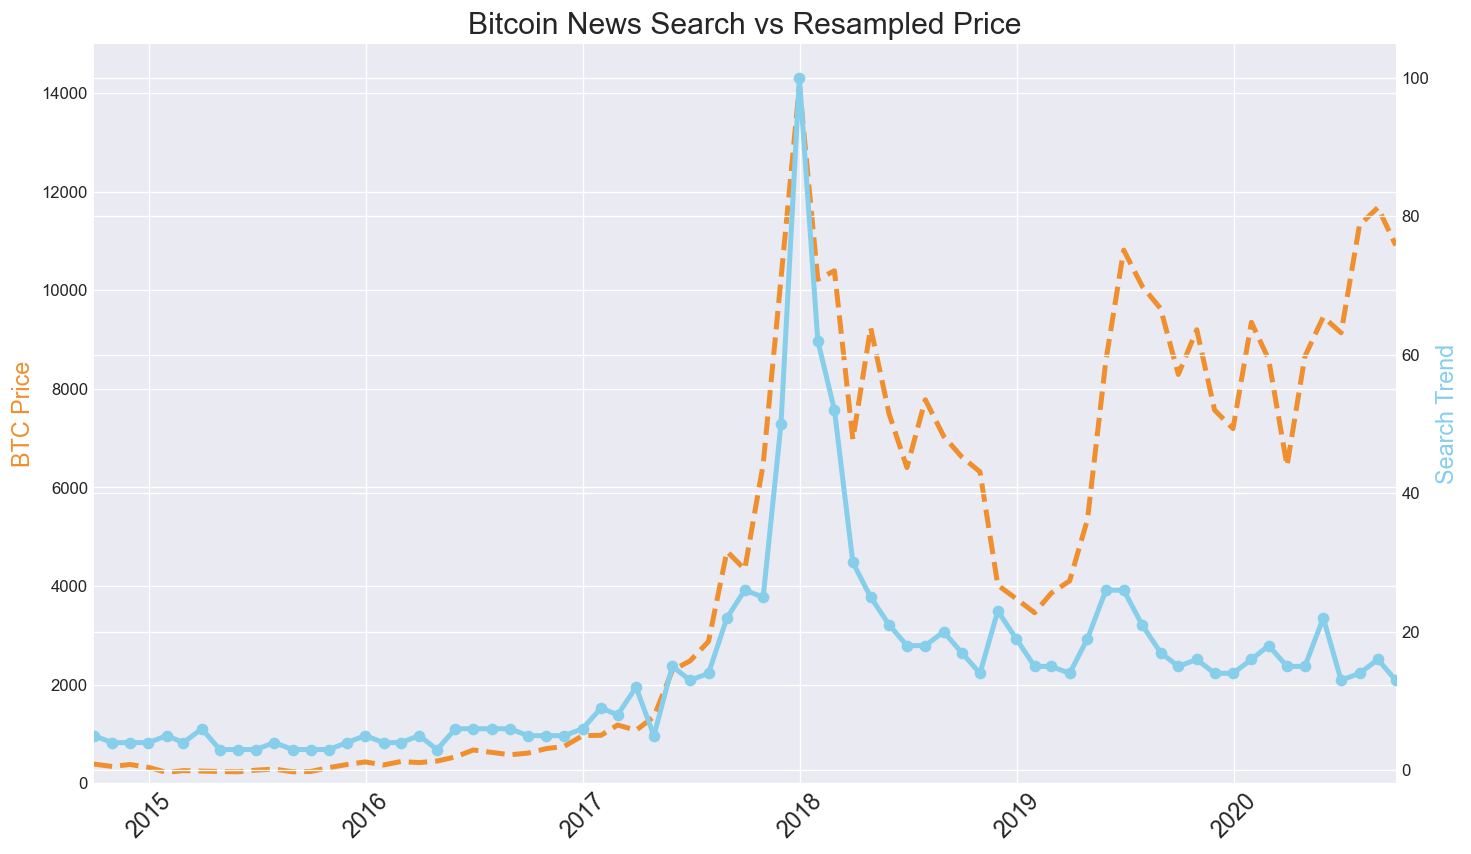

In [18]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# Apply locators for clean timeline
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set axis limits
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Dashed line for BTC price
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')

# Circle markers for search trend
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')

plt.show()

# 📉 Data Visualization – Unemployment & Search Trends

Next, let’s move to a **social dataset**.  
We’ll plot:  
- **Official U.S. Unemployment Rate (UNRATE)**  
- **Search Popularity for "Unemployment Benefits"**  

This gives us a chance to explore whether **people’s search behavior predicts economic pain**.  

🔍 Challenge:  
- Change title → *"Monthly Search of 'Unemployment Benefits' in the U.S. vs the U/E Rate"*  
- Left y-axis → *"FRED U/E Rate"*  
- Add a **grey dashed grid** for clarity  
- Adjust axis limits  
- Style unemployment rate as a dashed purple line  

The grid will help us detect **seasonality patterns** in the search data.  

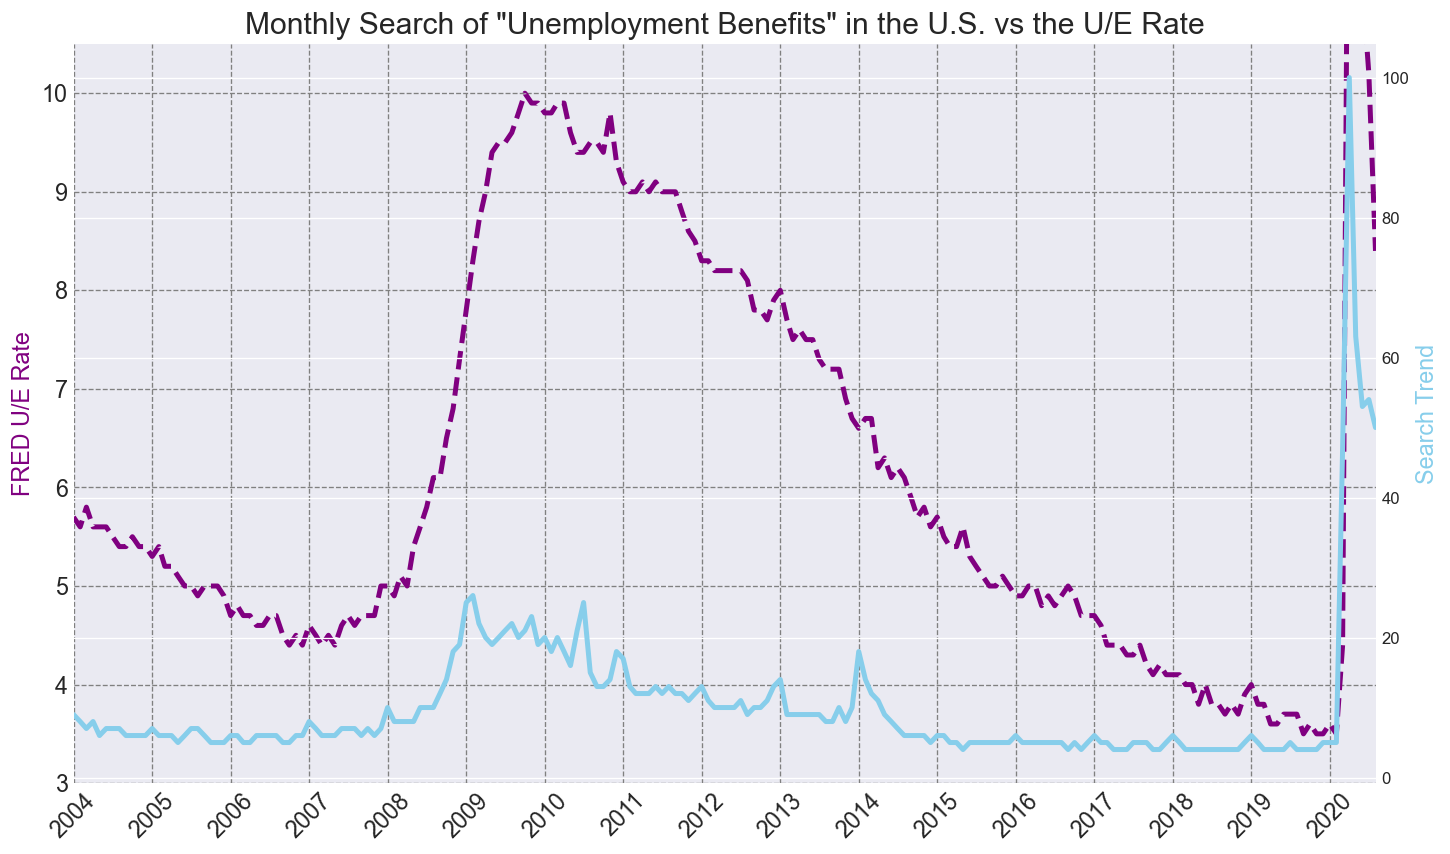

In [19]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Add grey dashed grid
ax1.grid(color='grey', linestyle='--')

# Dashed line for unemployment rate
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, 
         color='purple', linewidth=3, linestyle='--')

# Solid line for search trend
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)

plt.show()

## 🔄 Rolling Averages – Smoothing the Noise

The unemployment search data is **spiky** month to month.  
But what if we **smooth it out** with a rolling average?  

A rolling average helps us see **long-term trends** instead of random fluctuations.  

👉 Challenge:  
- Compute a **6-month rolling average** for both searches and unemployment.  
- Plot them together.  

Key question:  
⚡ Do searches for "Unemployment Benefits" *lead* the official unemployment rate?  
If so, search data could be a **leading indicator** of economic trouble.  

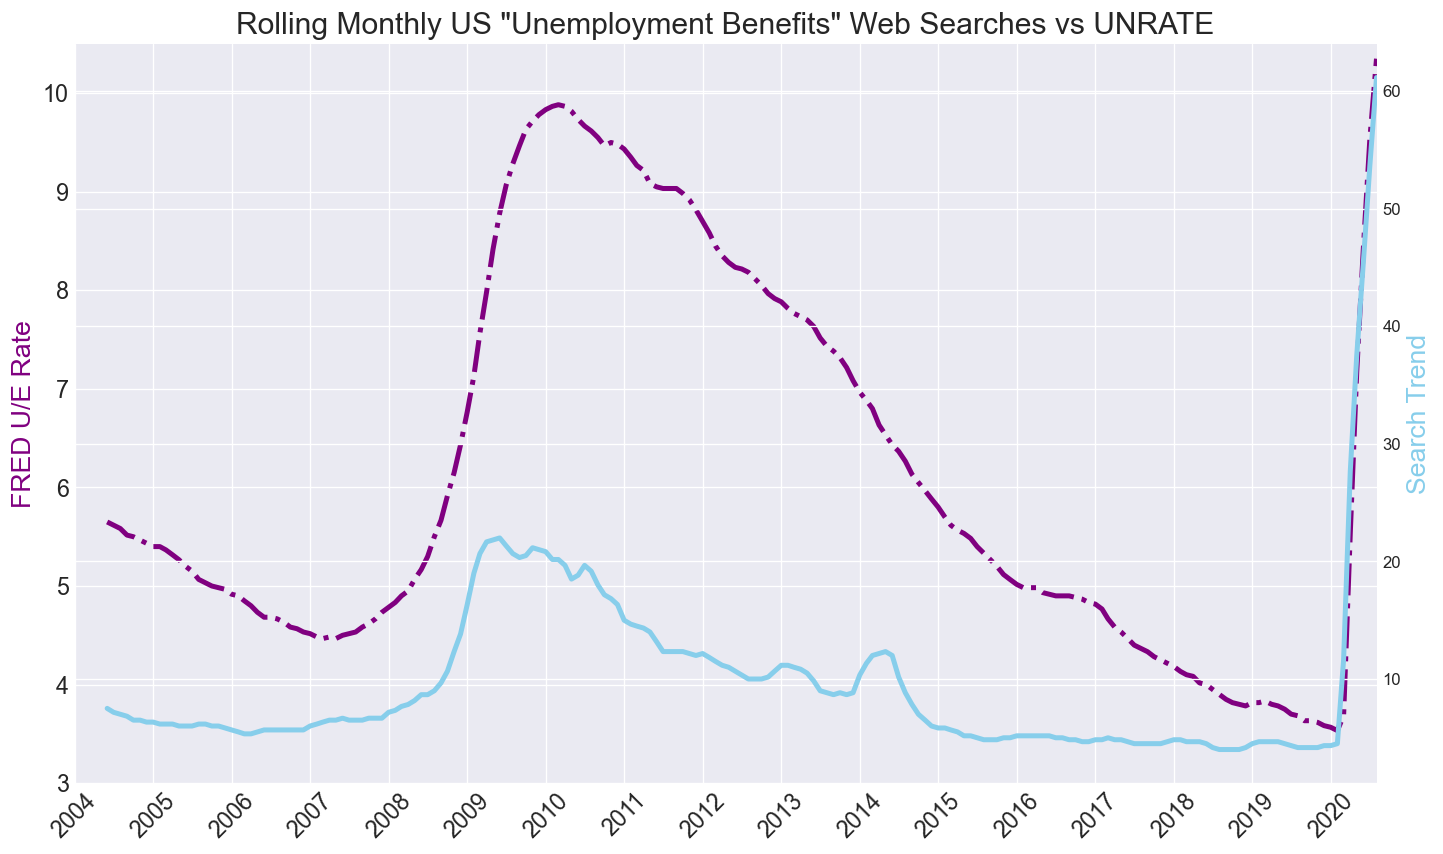

In [20]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Create rolling averages (6-month window)
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# Plot smoothed lines
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

# 📉 The Effect of New Data – 2020 Changed Everything

The **2008 financial crisis** was a once-in-a-generation shock to the economy… or so we thought.  
It took nearly **10 years** for unemployment rates to crawl back to pre-crisis levels.  

But what happens when we extend our analysis to include **2020**?  
With the COVID-19 pandemic, the world faced disruptions on a scale not seen in modern times.  

Let’s add the updated dataset (`UE Benefits Search vs UE Rate 2004-20.csv`) and visualize the true impact.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


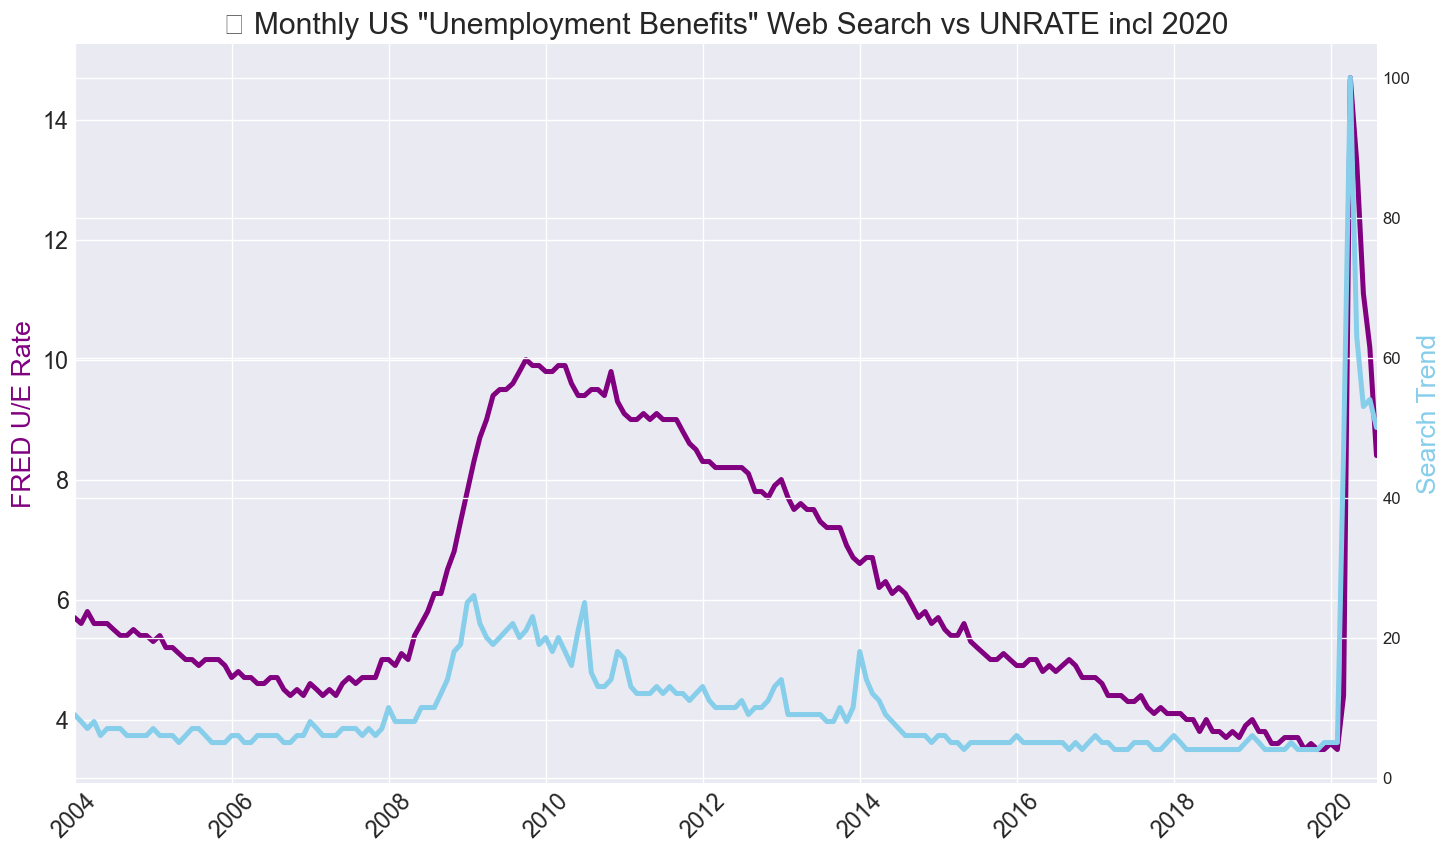

In [21]:
# Load the extended unemployment dataset (2004–2020)
df_ue_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")

# Convert MONTH column to datetime format
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

# Plotting unemployment vs web searches (including 2020)
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('📊 Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

# Set x-axis range
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

# Plot both series
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3, label="Unemployment Rate")
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3, label="Web Searches")

plt.show()

## 🚨 The 2020 Spike – A New Era of Uncertainty

What we see is shocking.  
The **COVID-19 pandemic** sent unemployment rates to **unprecedented levels**, far surpassing even the 2008 crash.  

- 📈 Web searches for *“Unemployment Benefits”* skyrocketed.  
- 🟣 The official unemployment rate spiked at a speed and magnitude the modern U.S. had never experienced.  
- Compared to 2008, the crisis was sharper, more sudden, and spread across nearly every sector.  

This chart reminds us how real-world events—beyond just economics—reshape data in ways no model could have perfectly predicted.  
The question that remains: **Will recovery be faster this time?**

# 🎯 Key Learning Points & Takeaways

Over the course of this project, we mastered not just Pandas and Matplotlib, but also **storytelling with data**.  
Here are the highlights of our journey:

✅ **Data Exploration**: Using `.head()`, `.tail()`, and `.describe()` to quickly understand our datasets.  
✅ **Resampling**: Matching time-series frequencies (daily → monthly) to make data comparable.  
✅ **Handling NaNs**: Counting and identifying missing values with `.isna().sum()`.  
✅ **Matplotlib Styling**: Fine-tuning plots with labels, limits, linewidths, colours, linestyles, and markers.  
✅ **Date Locators**: Using `YearLocator`, `MonthLocator`, and `DateFormatter` for professional timeline control.  
✅ **Grids for Seasonality**: Adding visual aids to reveal repeating patterns in the data.  
✅ **Rolling Averages**: Smoothing noisy data to uncover leading vs. lagging indicators.  
✅ **Impact of New Data**: Seeing how 2020 dramatically reshaped unemployment and search patterns.

---

# 🏆 Final Thoughts

Google Trends data is more than just search popularity—it’s a **real-time pulse of human behavior**.  
When combined with economic or financial datasets, it becomes a powerful tool for:  

- 📊 Detecting **leading indicators** (like search spikes before unemployment jumps)  
- 🔍 Understanding **market psychology** (Tesla hype vs. stock prices, Bitcoin mania)  
- 🌍 Gaining insights into **societal reactions** during crises (2008 vs. 2020)  

This project shows the power of data storytelling:  
Numbers and charts come alive when they’re tied to **real-world events** and **human decisions**.

✨ Well done for completing this deep dive! You’re now one step closer to thinking (and working) like a true **data scientist**.